In [164]:
% matplotlib inline

In [201]:
# get the list of plays
plays = []
with open("plays.txt") as f:
    for t in f.read()[1:-1].split(","):
        plays.append(str(t.strip()[1:-1]))

In [202]:
import pandas as pd
# get the data associated with the plays
plays_data_df = {}
out_dir = "data/"
for play in plays:
    plays_data_df[play] = pd.read_excel(out_dir + play + ".xlsx")

In [187]:
# see head of one play for sanity check
plays_data_df["Henry IV Part 1"].head()

,id,act,scene,line,ref,speech,speaker,text
0,1,1,1,1,1.1.1,1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,2,1,1,2,1.1.2,1,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,3,1,1,3,1.1.3,1,KING HENRY IV,And breathe short-winded accents of new broils
3,4,1,1,4,1.1.4,1,KING HENRY IV,To be commenced in strands afar remote.
4,5,1,1,5,1.1.5,1,KING HENRY IV,No more the thirsty entrance of this soil


In [188]:
def get_full_text(play_df):
    """
    :param play_df: dataframe for a single play
    :return the full text of the play as a single string
    """
    return '\n'.join(list(play_df["text"]))

In [189]:
import re
def get_full_words(play_df):
    """
    :param play_df: dataframe for a single play
    :return the full text of the play as a single list, all lowercase without punctuation
    """
    temp_str = " ".join(list(play_df["text"]))
    # keep only alphanumeric
    words = []
    for s in temp_str.split(" "):
        word = re.sub("[^a-zA-Z0-9-']", "", s.strip().lower())
        if word != "":
            words.append(word)
    return words

In [190]:
def get_word_counts(s):
    return pd.Series(s).value_counts()

sample_text = get_full_words(plays_data_df["Henry IV Part 1"])
sample_words = get_word_counts(sample_text)
print(sample_words.head())
print("Total words:\t\t" + str(len(sample_text)))
print("Total unique words:\t" + str(len(sample_words)))

the    820
and    818
i      622
of     620
a      527
dtype: int64
Total words:		23920
Total unique words:	3943


In [191]:
import matplotlib.pyplot as plt
import seaborn as sb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

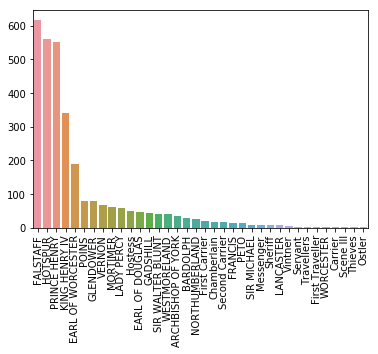

In [214]:
def get_speaker_line_counts(play_df, freq=False):
    """
    :param play_df: dataframe for a single play
    :param freq: boolean flag to determine whether to return percentages of overall play or nominal values
    :return Series containing the number of lines spoken by each character in the play
    """
    div = 1
    if freq:
        div = sum(play_df["speaker"].value_counts())
    return play_df["speaker"].value_counts() / div
res = get_speaker_line_counts(plays_data_df["Henry IV Part 1"])
sb.barplot(list(res.keys()), [res[k] for k in list(res.keys())])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

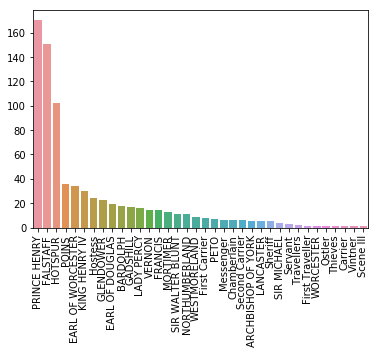

In [215]:
def get_speaker_speech_counts(play_df, freq=False):
    """
    :param play_df: dataframe for a single play
    :param freq: boolean flag to determine whether to return percentages of overall play or nominal values
    :return Series containing the number of lines spoken by each character in the play
    """
    speech_groups = list(play_df.groupby(["act", "scene", "speech", "speaker"]).groups)
    speakers = [t[3] for t in speech_groups]
    div = 1
    if freq:
        div = sum(pd.Series(speakers).value_counts())
    return pd.Series(speakers).value_counts() / div
res = get_speaker_speech_counts(plays_data_df["Henry IV Part 1"])
sb.barplot(list(res.keys()), [res[k] for k in list(res.keys())])
plt.xticks(rotation='vertical')

In [227]:
speech_lambda = lambda d, b=False: get_speaker_speech_counts(d, b)
lines_lambda = lambda d, b=False: get_speaker_line_counts(d, b)

def for_all_plays (lambda_func):
    nrows, ncols = 4, 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))
    plt.subplots_adjust(hspace=0.6, wspace=0.1)
    for i, ax in enumerate(axes.flatten()):
        if i == len(plays) or i == nrows * ncols:
            break
        play = plays[i]
        res = lambda_func(plays_data_df[play])[:30]
        cur_bar = sb.barplot(list(res.keys()), [res[k] for k in list(res.keys())], ax=ax)
        cur_bar.set(title=play)
        plt.sca(ax)
        plt.xticks(rotation='vertical')

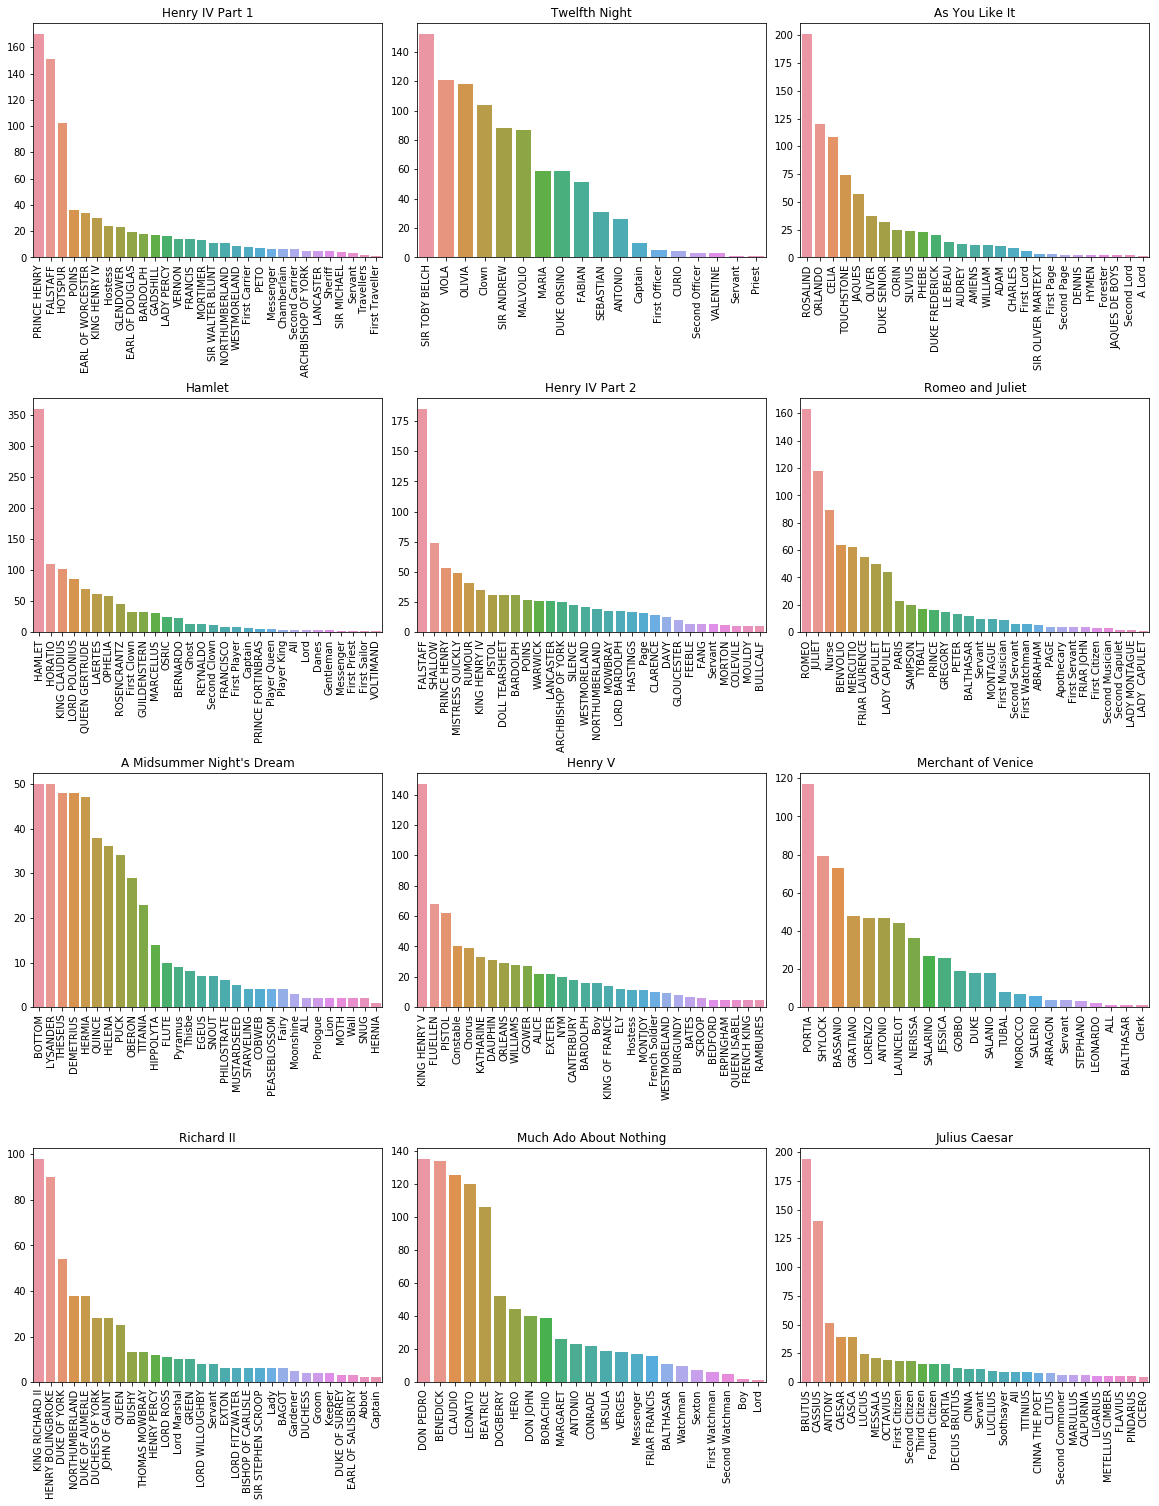

In [220]:
for_all_plays(speech_lambda)

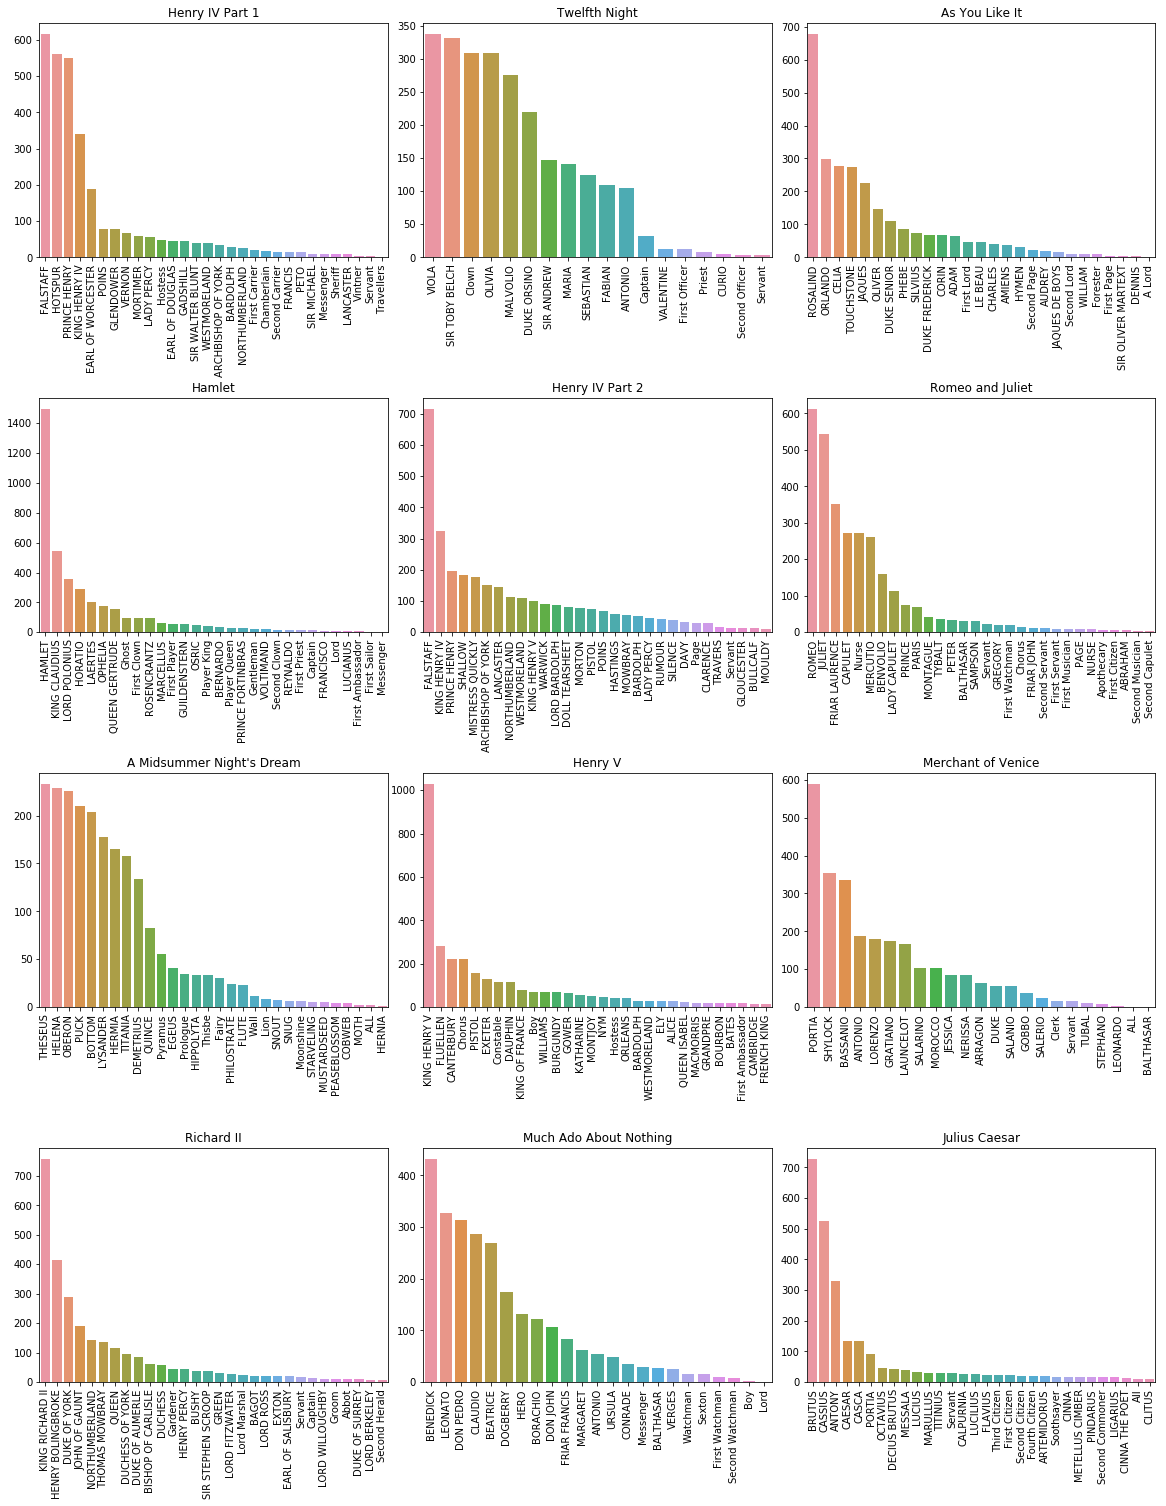

In [210]:
for_all_plays(lines_lambda)

In [274]:
def for_all_plays_overlaid ():
    nrows, ncols = 4, 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))
    plt.subplots_adjust(hspace=0.6, wspace=0.15)
    for i, ax in enumerate(axes.flatten()):
        if i == len(plays) or i == nrows * ncols:
            break
        play = plays[i]
        plt.sca(ax)
        res = get_speaker_speech_counts(plays_data_df[play], True)[:30]
        cur_bar = plt.bar(range(len(res)), [res[k] for k in list(res.keys())], color=(0.7, 0, 0, 0.3),
                          tick_label=list(res.keys()))
        
        res2 = get_speaker_line_counts(plays_data_df[play], True)[:30]
        cur_bar2 = plt.bar(range(len(res2)), [res2[k] for k in list(res2.keys())], color=(0, 0, 0.7, 0.3),
                          tick_label=list(res2.keys()))
#         cur_bar.set(title=play)
#         res = get_speaker_line_counts(plays_data_df[play], True)[:30]
#         cur_bar = plt.bar(list(res.keys()), [res[k] for k in list(res.keys())], ax=ax, color=(0, 0.5, 0, 0.3))
#         cur_bar.set(title=play)
        plt.xticks(rotation='vertical')
        plt.title(play)

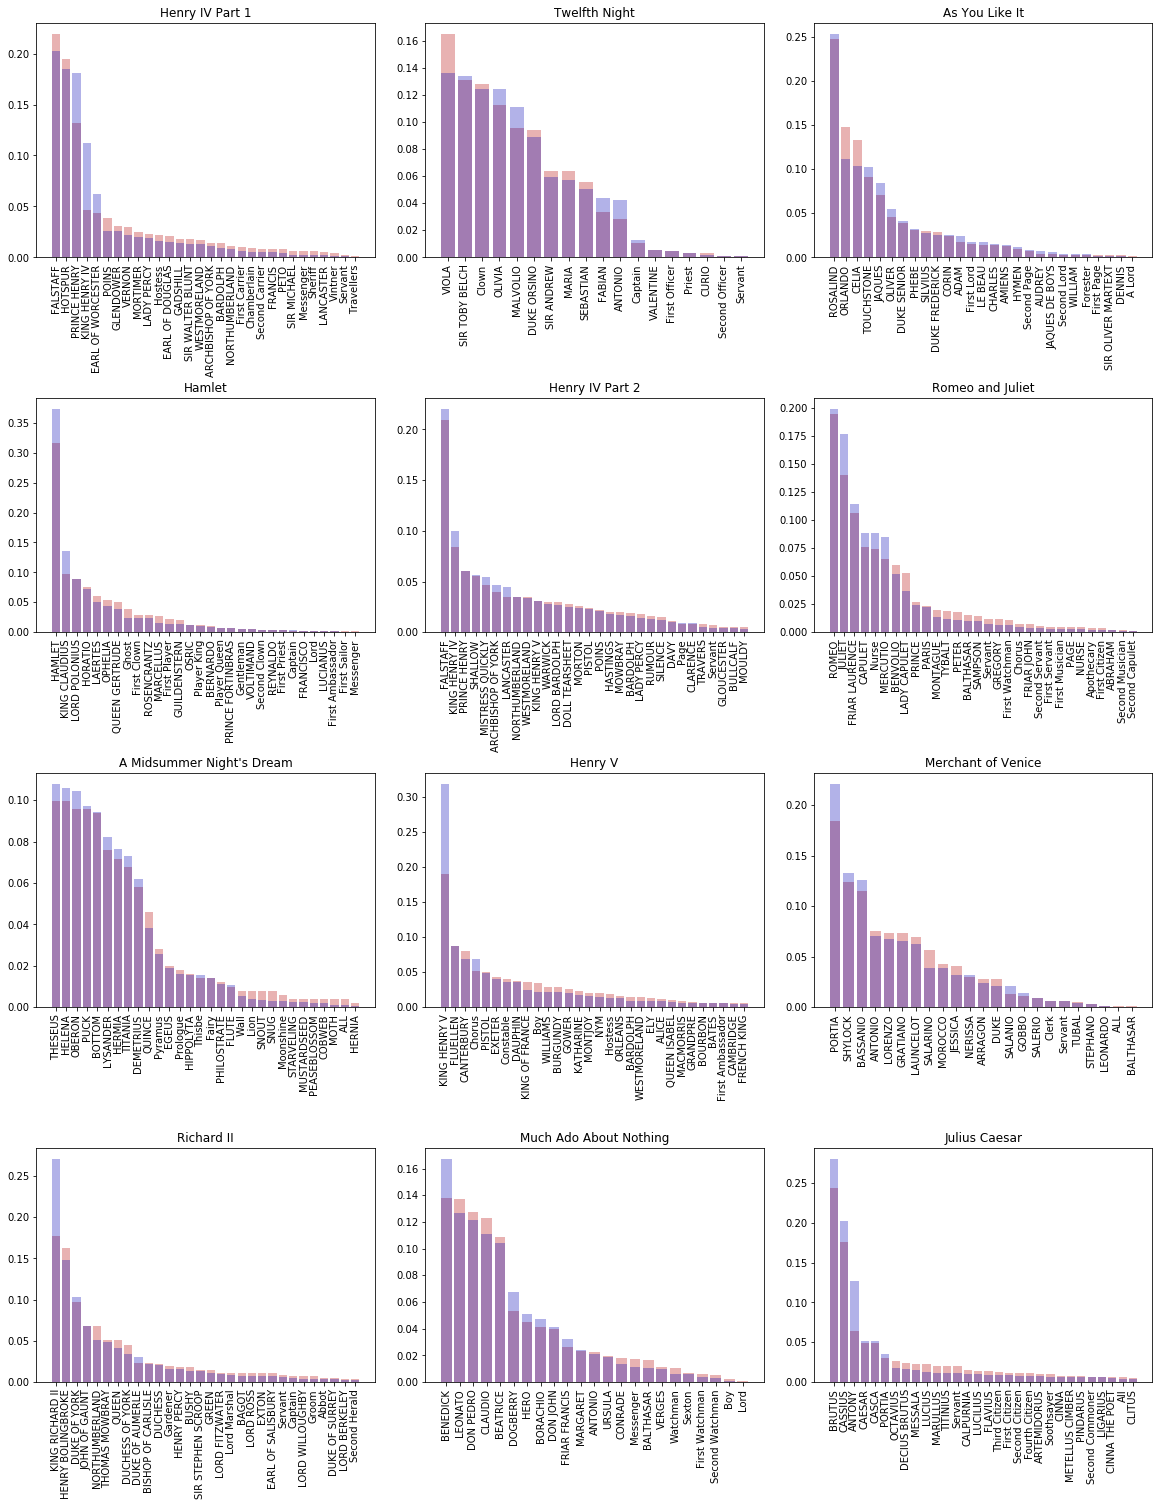

In [275]:
for_all_plays_overlaid()